In [9]:
L,l = 14,12;  # 图的大长，小长
R,r = 1.5,0.5;  # 图的大径，小径
d = 0.1;  # 分度长度
M,N = Int(L/d),Int(2*R/d); #横纵切块数
m,n=Int(l/d),Int(2*r/d); #横纵切块
dt = 100; #仿真时序步长
tfinal=600;
step=round(tfinal/dt);

#一些参数设置
Vtotal = l*pi*r^2; #总体积
S = 2*pi*r*l+2*pi*r^2; #总面积
k,c,rho = 0.6,4200,1000;  #水传热系数，比热，密度
ka,ca,rhoa=0.023,1005,1.293;
K = k/c/rho; #折合传热系数
v = 10; #洋流速度
h = 44.45e-3; #高
b = 482.6e-3;#宽
a = 525e-3; #长
V0 = a*b*h; #小体积
Q = 500; #发热量
q = Q/V0; #单位体积发热量
qs0 = q/c/rho; #折合发热量
Number = round(Vtotal/V0); #小盒子数量
Number=200;
qs = Number*V0/Vtotal*qs0; #总折合发热量
T0 = 273.15; #绝对零度
Tenv=20;
Tin=50;

function edge(j::Int64,i::Int64)
    if (M-m)/2<j<(M+m)/2 && (N-n)/2<i<(N+n)/2
        return "in"
    elseif (j==(M-m)/2 || j==(M+m)/2) && (N-n)/2<=i<=(N+n)/2
        return "on-updown"
    elseif (i==(N-n)/2 || i==(N+n)/2) &&  (M-m)/2<=j<=(M+m)/2
        return "on-side"
    elseif i<(N-n)/2 || i>(N+n)/2
        return "side"
    else
        return "updown"
    end
end

function next_ji(j,i,Tnow)
    Tji = Tnow[j,i];
    Tji1 = Tnow[j-1,i];
    Tji2 = Tnow[j+1,i];
    Tji3 = Tnow[j,i-1];
    Tji4 = Tnow[j,i+1];
    T22=(Tji1+Tji2+Tji3+Tji4-4*Tji)/d^2;
    Tz_ = abs((Tji2-Tji1)/2/d);
    rho_a=rhoa*T0/Tji;
    Ka=ka/ca/rho_a
    if edge(j,i)=="in"
        Tji_next=Tji+dt*(Ka*T22+qs);
    elseif edge(j,i)=="side"
        Tji_next=Tji+dt*(K*T22-v*Tz_/c/rho);
    elseif edge(j,i)=="on-side"
        Tji_next=Tji+dt*(Ka*T22+qs-v*Tz_/c/rho);
    elseif edge(j,i)=="on-updown"
        Tji_next=Tji+dt*(Ka*T22+qs);
    else
        Tji_next=Tji+dt*(K*T22+0);
    end
    return Tji_next;
end

function next_T(Tnow)
    T_next=zeros(M,N);
    T_next=T_next.+Tenv.+T0;
    for j in 2:M-1
        for i in 2:N-1
            T_next[j,i]=next_ji(j,i,Tnow);
        end
    end
    return T_next;
end

function get_T_init()
    T_init=zeros(M,N);
    for j in 1:M
        for i in 1:N
            if edge(j,i) in ["in","on-side","on-updown"]
                T_init[j,i]=Tin+T0;
            else
                T_init[j,i]+=Tenv+T0;
            end
        end
    end
    return T_init
end

get_T_init (generic function with 1 method)

In [10]:
using Plots;
using Statistics;
Tinit=get_T_init();

# Number=150

56.66883422334456


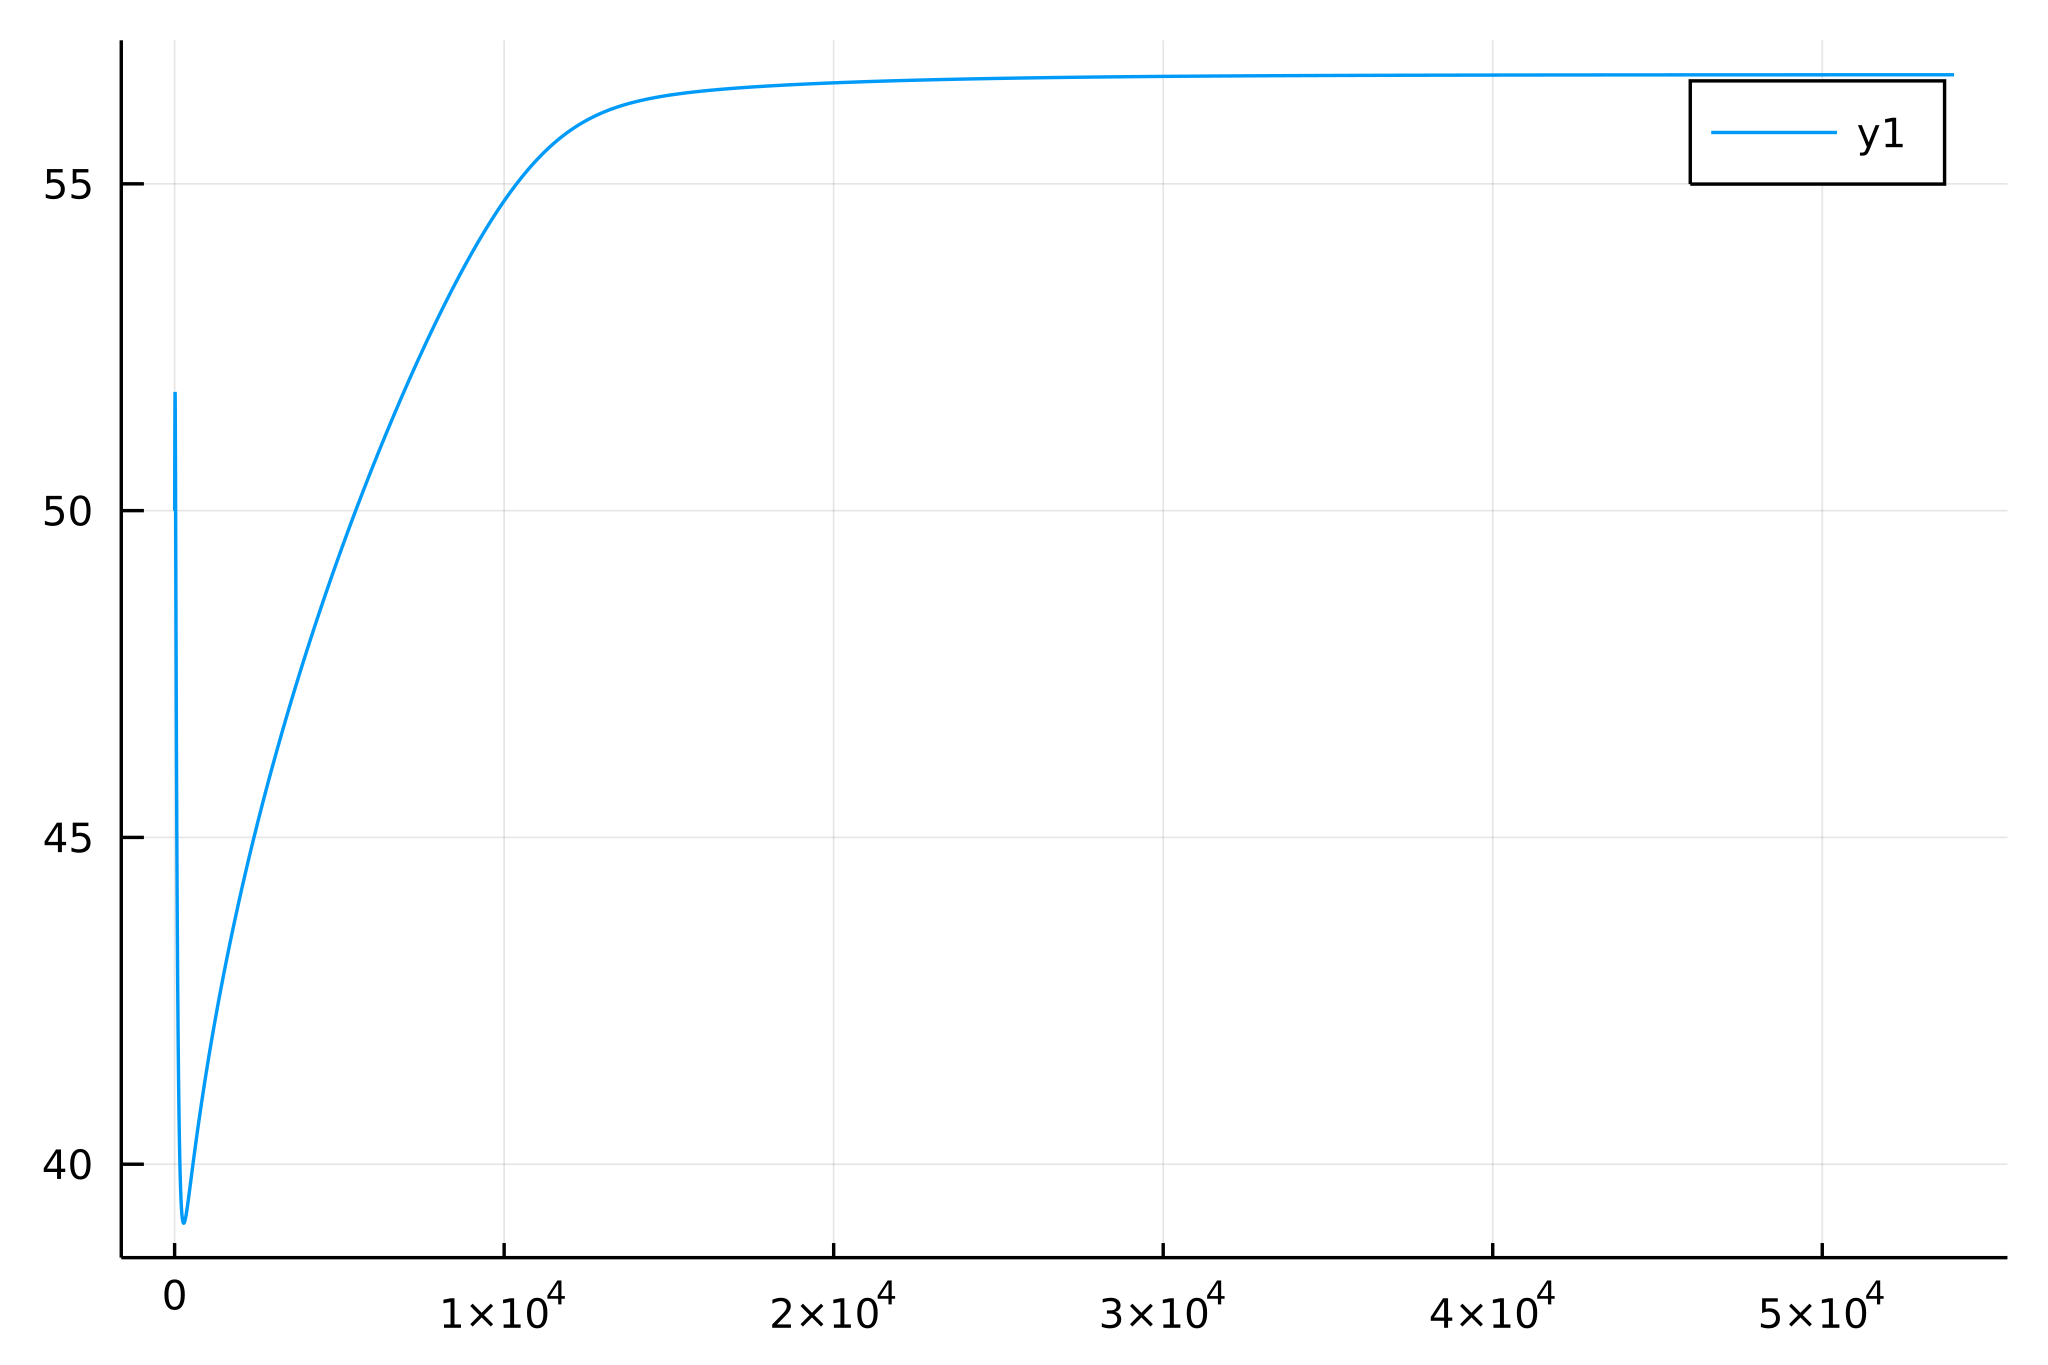

In [11]:
L,l = 14,12;  # 图的大长，小长
R,r = 1.5,0.5;  # 图的大径，小径
d = 0.1;  # 分度长度
M,N = Int(L/d),Int(2*R/d); #横纵切块数
m,n=Int(l/d),Int(2*r/d); #横纵切块
dt = 100; #仿真时序步长
tfinal=600;
step=round(tfinal/dt);

#一些参数设置
Vtotal = l*pi*r^2; #总体积
S = 2*pi*r*l+2*pi*r^2; #总面积
k,c,rho = 0.6,4200,1000;  #水传热系数，比热，密度
ka,ca,rhoa=0.023,1005,1.293;
K = k/c/rho; #折合传热系数
v = 20; #洋流速度
h = 44.45e-3; #高
b = 482.6e-3;#宽
a = 525e-3; #长
V0 = a*b*h; #小体积
Q = 500; #发热量
q = Q/V0; #单位体积发热量
qs0 = q/c/rho; #折合发热量
Number = round(Vtotal/V0); #小盒子数量
Number=150;
qs = Number*V0/Vtotal*qs0; #总折合发热量
T0 = 273.15; #绝对零度
Tenv=20;
Tin=50;

function edge(j::Int64,i::Int64)
    if (M-m)/2<j<(M+m)/2 && (N-n)/2<i<(N+n)/2
        return "in"
    elseif (j==(M-m)/2 || j==(M+m)/2) && (N-n)/2<=i<=(N+n)/2
        return "on-updown"
    elseif (i==(N-n)/2 || i==(N+n)/2) &&  (M-m)/2<=j<=(M+m)/2
        return "on-side"
    elseif i<(N-n)/2 || i>(N+n)/2
        return "side"
    else
        return "updown"
    end
end

function next_ji(j,i,Tnow)
    Tji = Tnow[j,i];
    Tji1 = Tnow[j-1,i];
    Tji2 = Tnow[j+1,i];
    Tji3 = Tnow[j,i-1];
    Tji4 = Tnow[j,i+1];
    T22=(Tji1+Tji2+Tji3+Tji4-4*Tji)/d^2;
    Tz_ = abs((Tji2-Tji1)/2/d);
    rho_a=rhoa*T0/Tji;
    Ka=ka/ca/rho_a
    if edge(j,i)=="in"
        Tji_next=Tji+dt*(Ka*T22+qs);
    elseif edge(j,i)=="side"
        Tji_next=Tji+dt*(K*T22-v*Tz_/c/rho);
    elseif edge(j,i)=="on-side"
        Tji_next=Tji+dt*(Ka*T22+qs-v*Tz_/c/rho);
    elseif edge(j,i)=="on-updown"
        Tji_next=Tji+dt*(Ka*T22+qs);
    else
        Tji_next=Tji+dt*(K*T22+0);
    end
    return Tji_next;
end

function next_T(Tnow)
    T_next=zeros(M,N);
    T_next=T_next.+Tenv.+T0;
    for j in 2:M-1
        for i in 2:N-1
            T_next[j,i]=next_ji(j,i,Tnow);
        end
    end
    return T_next;
end

function get_T_init()
    T_init=zeros(M,N);
    for j in 1:M
        for i in 1:N
            if edge(j,i) in ["in","on-side","on-updown"]
                T_init[j,i]=Tin+T0;
            else
                T_init[j,i]+=Tenv+T0;
            end
        end
    end
    return T_init
end


Titer=Tinit;
Tmax150=[]
for i in 1:6*6*300*5
    tmp=maximum(maximum(Titer))
    push!(Tmax150,tmp)
    Titer=next_T(Titer)
end
Tmax150=Tmax150.-T0
println(maximum(maximum(Titer))-T0)
plot(Tmax150)

# Number=160

58.89470826237704


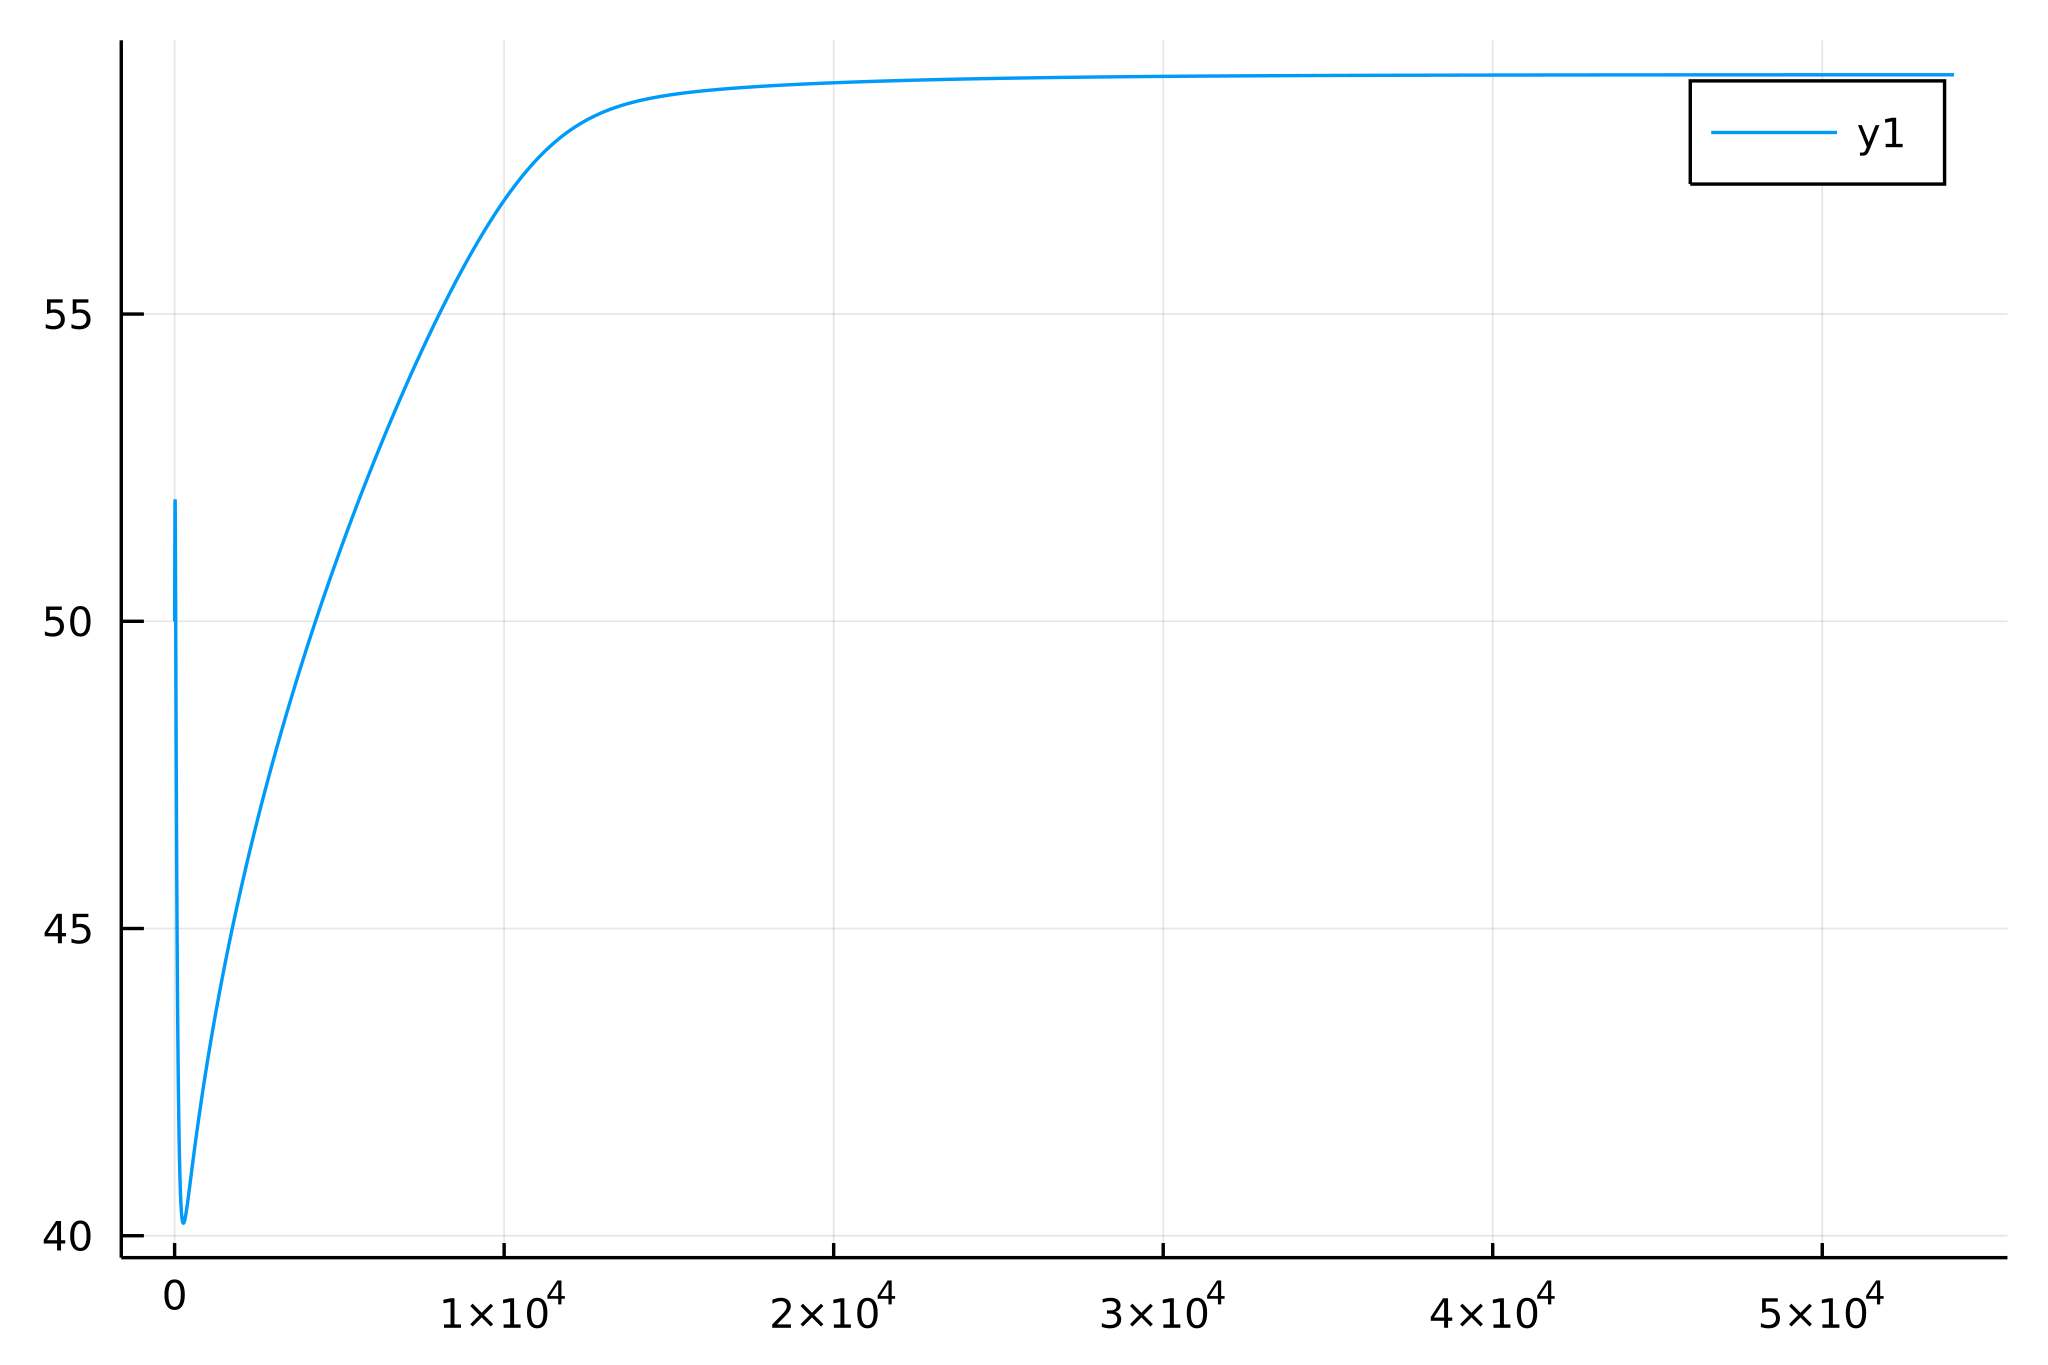

In [12]:
L,l = 14,12;  # 图的大长，小长
R,r = 1.5,0.5;  # 图的大径，小径
d = 0.1;  # 分度长度
M,N = Int(L/d),Int(2*R/d); #横纵切块数
m,n=Int(l/d),Int(2*r/d); #横纵切块
dt = 100; #仿真时序步长
tfinal=600;
step=round(tfinal/dt);

#一些参数设置
Vtotal = l*pi*r^2; #总体积
S = 2*pi*r*l+2*pi*r^2; #总面积
k,c,rho = 0.6,4200,1000;  #水传热系数，比热，密度
ka,ca,rhoa=0.023,1005,1.293;
K = k/c/rho; #折合传热系数
v = 20; #洋流速度
h = 44.45e-3; #高
b = 482.6e-3;#宽
a = 525e-3; #长
V0 = a*b*h; #小体积
Q = 500; #发热量
q = Q/V0; #单位体积发热量
qs0 = q/c/rho; #折合发热量
Number = round(Vtotal/V0); #小盒子数量
Number=160;
qs = Number*V0/Vtotal*qs0; #总折合发热量
T0 = 273.15; #绝对零度
Tenv=20;
Tin=50;

function edge(j::Int64,i::Int64)
    if (M-m)/2<j<(M+m)/2 && (N-n)/2<i<(N+n)/2
        return "in"
    elseif (j==(M-m)/2 || j==(M+m)/2) && (N-n)/2<=i<=(N+n)/2
        return "on-updown"
    elseif (i==(N-n)/2 || i==(N+n)/2) &&  (M-m)/2<=j<=(M+m)/2
        return "on-side"
    elseif i<(N-n)/2 || i>(N+n)/2
        return "side"
    else
        return "updown"
    end
end

function next_ji(j,i,Tnow)
    Tji = Tnow[j,i];
    Tji1 = Tnow[j-1,i];
    Tji2 = Tnow[j+1,i];
    Tji3 = Tnow[j,i-1];
    Tji4 = Tnow[j,i+1];
    T22=(Tji1+Tji2+Tji3+Tji4-4*Tji)/d^2;
    Tz_ = abs((Tji2-Tji1)/2/d);
    rho_a=rhoa*T0/Tji;
    Ka=ka/ca/rho_a
    if edge(j,i)=="in"
        Tji_next=Tji+dt*(Ka*T22+qs);
    elseif edge(j,i)=="side"
        Tji_next=Tji+dt*(K*T22-v*Tz_/c/rho);
    elseif edge(j,i)=="on-side"
        Tji_next=Tji+dt*(Ka*T22+qs-v*Tz_/c/rho);
    elseif edge(j,i)=="on-updown"
        Tji_next=Tji+dt*(Ka*T22+qs);
    else
        Tji_next=Tji+dt*(K*T22+0);
    end
    return Tji_next;
end

function next_T(Tnow)
    T_next=zeros(M,N);
    T_next=T_next.+Tenv.+T0;
    for j in 2:M-1
        for i in 2:N-1
            T_next[j,i]=next_ji(j,i,Tnow);
        end
    end
    return T_next;
end

function get_T_init()
    T_init=zeros(M,N);
    for j in 1:M
        for i in 1:N
            if edge(j,i) in ["in","on-side","on-updown"]
                T_init[j,i]=Tin+T0;
            else
                T_init[j,i]+=Tenv+T0;
            end
        end
    end
    return T_init
end
Titer=Tinit;
Tmax160=[]
for i in 1:6*6*300*5
    tmp=maximum(maximum(Titer))
    push!(Tmax160,tmp)
    Titer=next_T(Titer)
end
Tmax160=Tmax160.-T0
println(maximum(maximum(Titer))-T0)
plot(Tmax160)

# Number=170

61.09807815800201


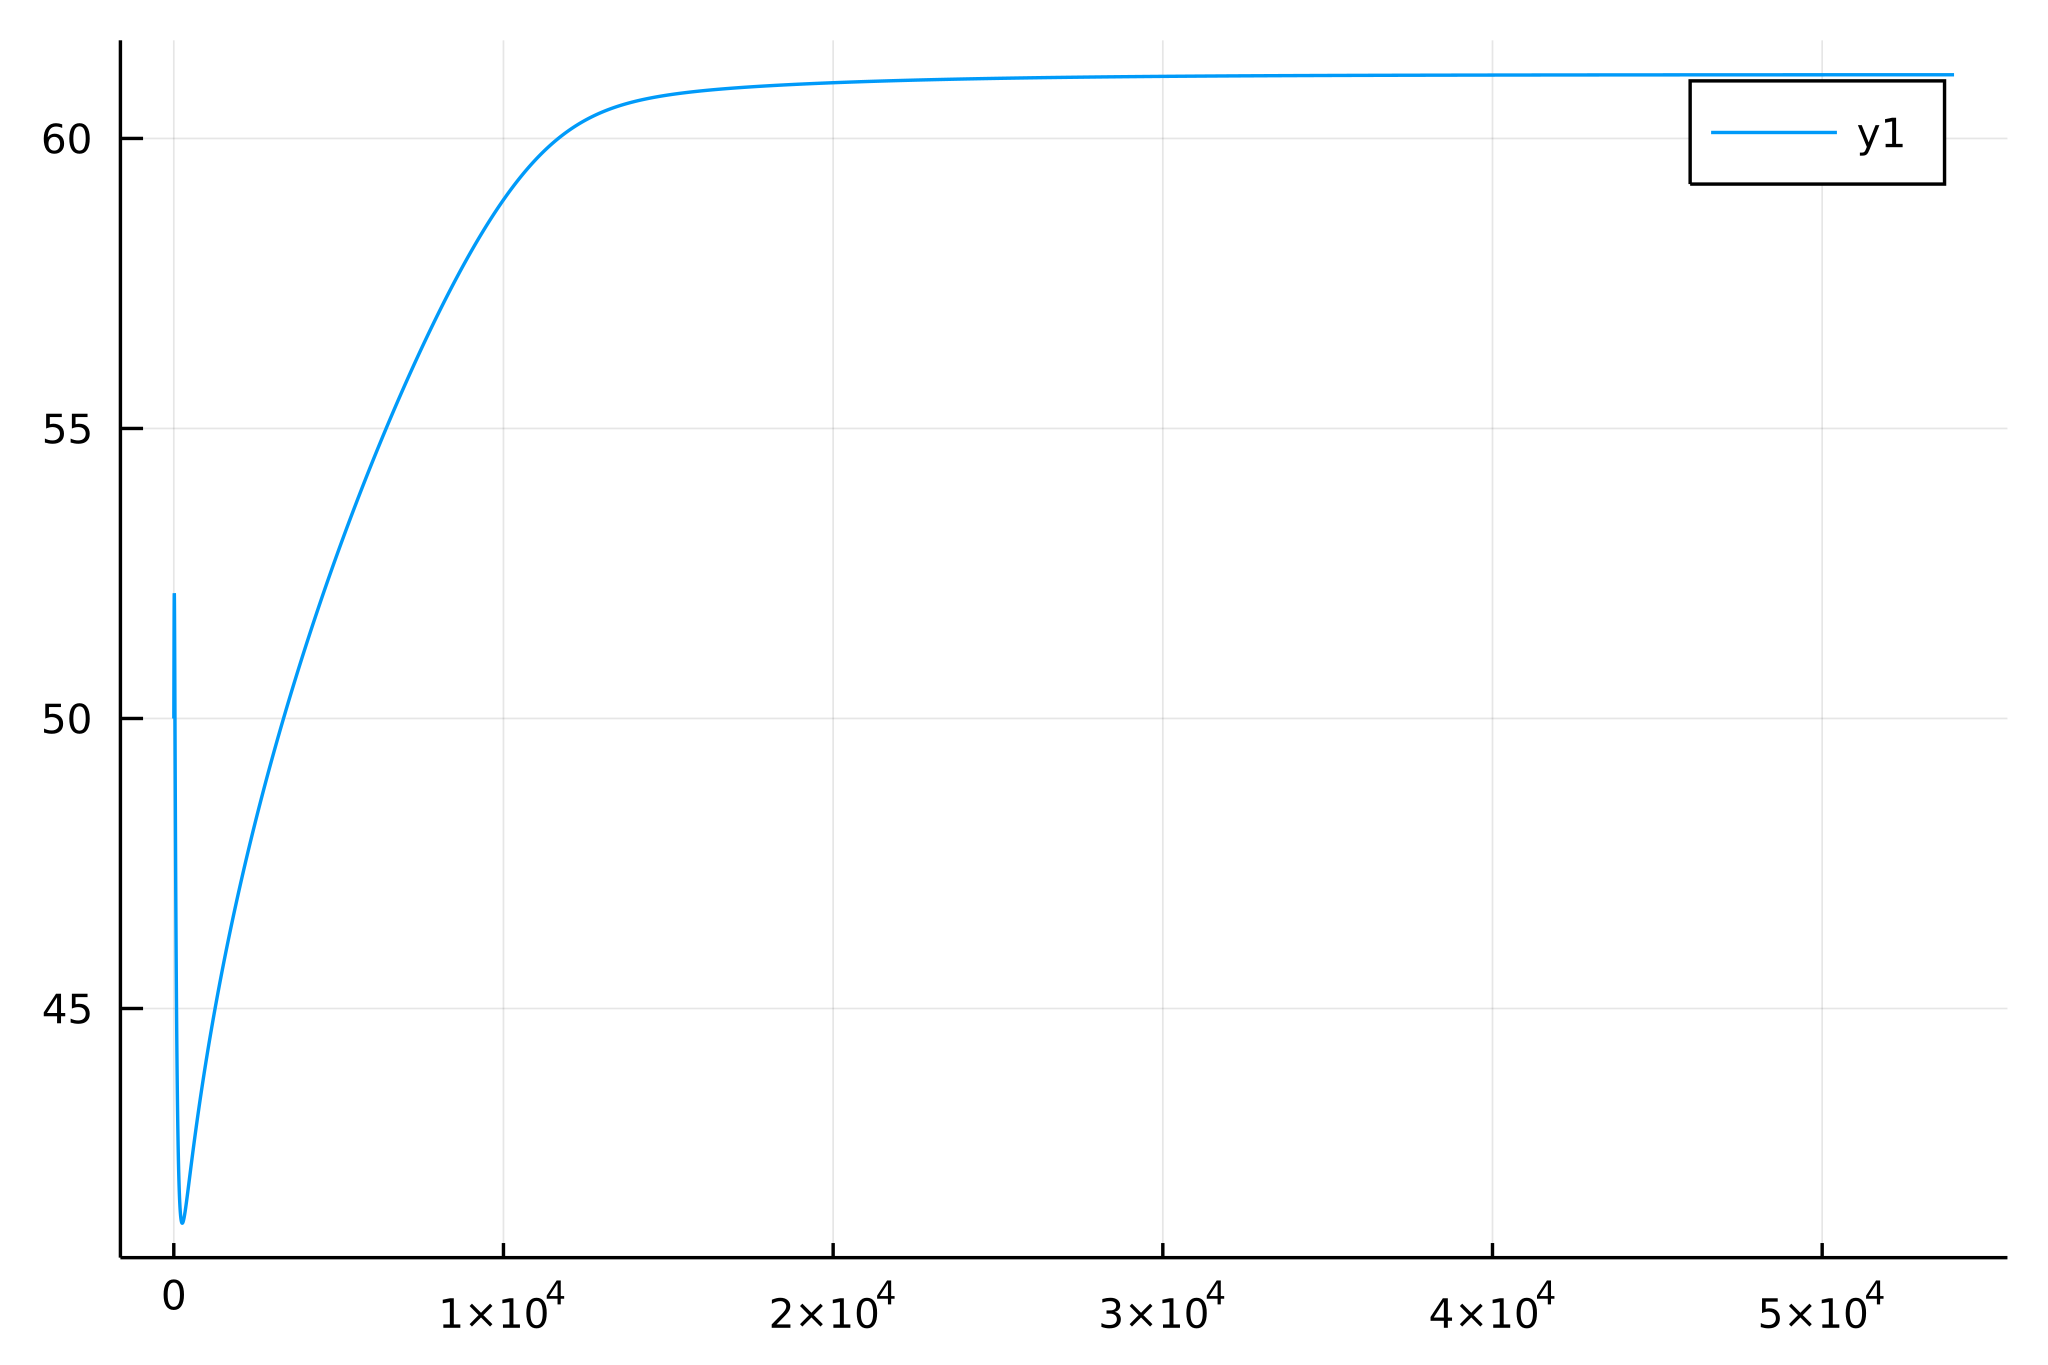

In [13]:
L,l = 14,12;  # 图的大长，小长
R,r = 1.5,0.5;  # 图的大径，小径
d = 0.1;  # 分度长度
M,N = Int(L/d),Int(2*R/d); #横纵切块数
m,n=Int(l/d),Int(2*r/d); #横纵切块
dt = 100; #仿真时序步长
tfinal=600;
step=round(tfinal/dt);

#一些参数设置
Vtotal = l*pi*r^2; #总体积
S = 2*pi*r*l+2*pi*r^2; #总面积
k,c,rho = 0.6,4200,1000;  #水传热系数，比热，密度
ka,ca,rhoa=0.023,1005,1.293;
K = k/c/rho; #折合传热系数
v = 20; #洋流速度
h = 44.45e-3; #高
b = 482.6e-3;#宽
a = 525e-3; #长
V0 = a*b*h; #小体积
Q = 500; #发热量
q = Q/V0; #单位体积发热量
qs0 = q/c/rho; #折合发热量
Number = round(Vtotal/V0); #小盒子数量
Number=170;
qs = Number*V0/Vtotal*qs0; #总折合发热量
T0 = 273.15; #绝对零度
Tenv=20;
Tin=50;

function edge(j::Int64,i::Int64)
    if (M-m)/2<j<(M+m)/2 && (N-n)/2<i<(N+n)/2
        return "in"
    elseif (j==(M-m)/2 || j==(M+m)/2) && (N-n)/2<=i<=(N+n)/2
        return "on-updown"
    elseif (i==(N-n)/2 || i==(N+n)/2) &&  (M-m)/2<=j<=(M+m)/2
        return "on-side"
    elseif i<(N-n)/2 || i>(N+n)/2
        return "side"
    else
        return "updown"
    end
end

function next_ji(j,i,Tnow)
    Tji = Tnow[j,i];
    Tji1 = Tnow[j-1,i];
    Tji2 = Tnow[j+1,i];
    Tji3 = Tnow[j,i-1];
    Tji4 = Tnow[j,i+1];
    T22=(Tji1+Tji2+Tji3+Tji4-4*Tji)/d^2;
    Tz_ = abs((Tji2-Tji1)/2/d);
    rho_a=rhoa*T0/Tji;
    Ka=ka/ca/rho_a
    if edge(j,i)=="in"
        Tji_next=Tji+dt*(Ka*T22+qs);
    elseif edge(j,i)=="side"
        Tji_next=Tji+dt*(K*T22-v*Tz_/c/rho);
    elseif edge(j,i)=="on-side"
        Tji_next=Tji+dt*(Ka*T22+qs-v*Tz_/c/rho);
    elseif edge(j,i)=="on-updown"
        Tji_next=Tji+dt*(Ka*T22+qs);
    else
        Tji_next=Tji+dt*(K*T22+0);
    end
    return Tji_next;
end

function next_T(Tnow)
    T_next=zeros(M,N);
    T_next=T_next.+Tenv.+T0;
    for j in 2:M-1
        for i in 2:N-1
            T_next[j,i]=next_ji(j,i,Tnow);
        end
    end
    return T_next;
end

function get_T_init()
    T_init=zeros(M,N);
    for j in 1:M
        for i in 1:N
            if edge(j,i) in ["in","on-side","on-updown"]
                T_init[j,i]=Tin+T0;
            else
                T_init[j,i]+=Tenv+T0;
            end
        end
    end
    return T_init
end
Titer=Tinit;
Tmax170=[]
for i in 1:6*6*300*5
    tmp=maximum(maximum(Titer))
    push!(Tmax170,tmp)
    Titer=next_T(Titer)
end
Tmax170=Tmax170.-T0
println(maximum(maximum(Titer))-T0)
plot(Tmax170)

# Number=180

63.27960566362299


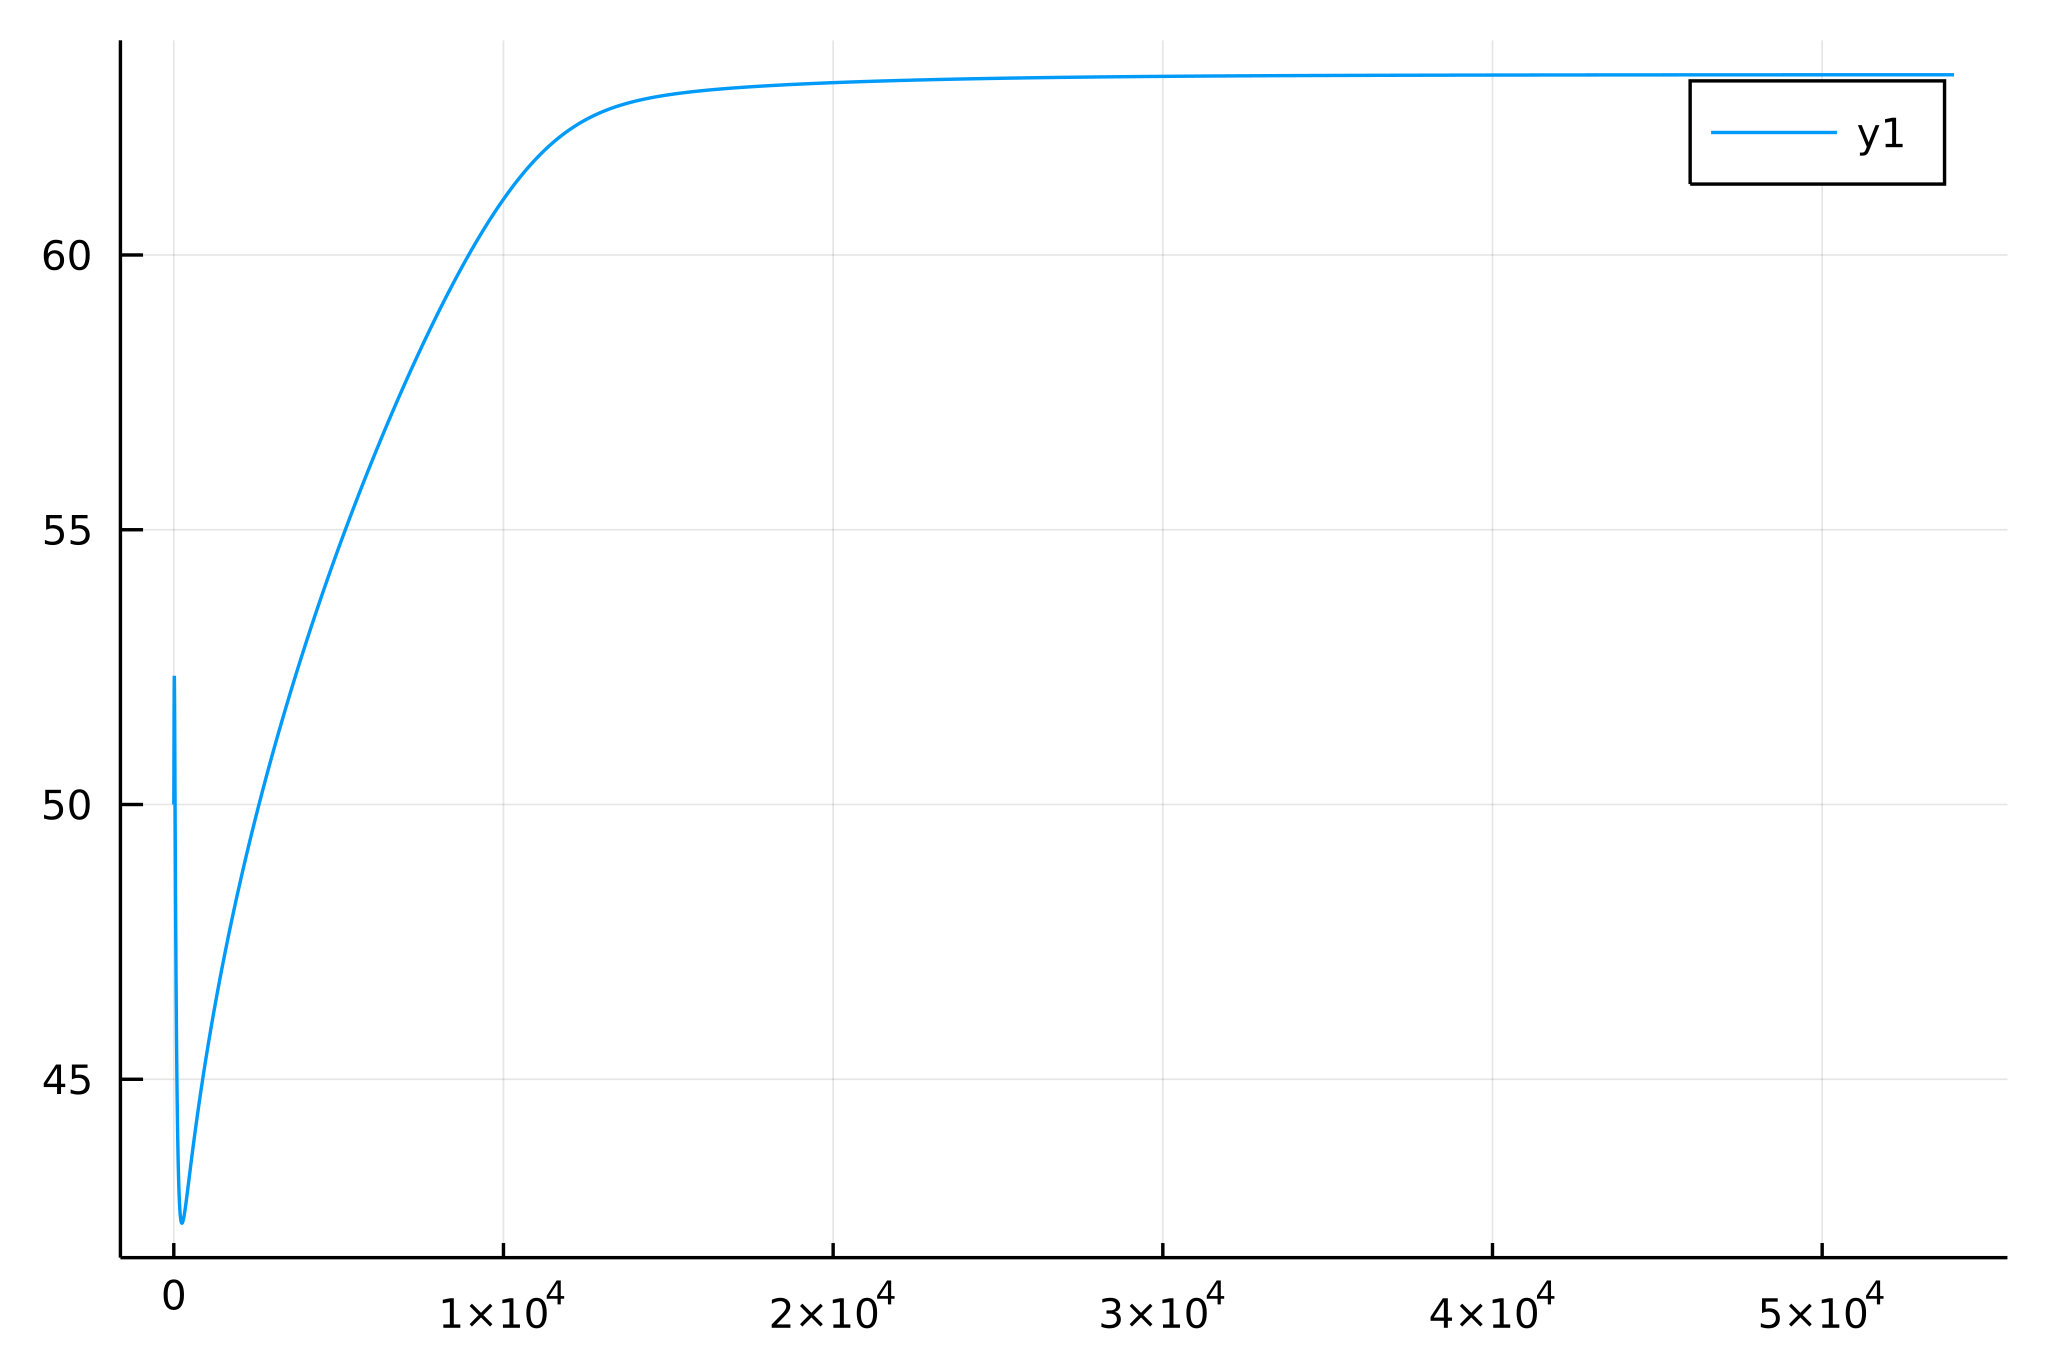

In [14]:
L,l = 14,12;  # 图的大长，小长
R,r = 1.5,0.5;  # 图的大径，小径
d = 0.1;  # 分度长度
M,N = Int(L/d),Int(2*R/d); #横纵切块数
m,n=Int(l/d),Int(2*r/d); #横纵切块
dt = 100; #仿真时序步长
tfinal=600;
step=round(tfinal/dt);

#一些参数设置
Vtotal = l*pi*r^2; #总体积
S = 2*pi*r*l+2*pi*r^2; #总面积
k,c,rho = 0.6,4200,1000;  #水传热系数，比热，密度
ka,ca,rhoa=0.023,1005,1.293;
K = k/c/rho; #折合传热系数
v = 20; #洋流速度
h = 44.45e-3; #高
b = 482.6e-3;#宽
a = 525e-3; #长
V0 = a*b*h; #小体积
Q = 500; #发热量
q = Q/V0; #单位体积发热量
qs0 = q/c/rho; #折合发热量
Number = round(Vtotal/V0); #小盒子数量
Number=180;
qs = Number*V0/Vtotal*qs0; #总折合发热量
T0 = 273.15; #绝对零度
Tenv=20;
Tin=50;

function edge(j::Int64,i::Int64)
    if (M-m)/2<j<(M+m)/2 && (N-n)/2<i<(N+n)/2
        return "in"
    elseif (j==(M-m)/2 || j==(M+m)/2) && (N-n)/2<=i<=(N+n)/2
        return "on-updown"
    elseif (i==(N-n)/2 || i==(N+n)/2) &&  (M-m)/2<=j<=(M+m)/2
        return "on-side"
    elseif i<(N-n)/2 || i>(N+n)/2
        return "side"
    else
        return "updown"
    end
end

function next_ji(j,i,Tnow)
    Tji = Tnow[j,i];
    Tji1 = Tnow[j-1,i];
    Tji2 = Tnow[j+1,i];
    Tji3 = Tnow[j,i-1];
    Tji4 = Tnow[j,i+1];
    T22=(Tji1+Tji2+Tji3+Tji4-4*Tji)/d^2;
    Tz_ = abs((Tji2-Tji1)/2/d);
    rho_a=rhoa*T0/Tji;
    Ka=ka/ca/rho_a
    if edge(j,i)=="in"
        Tji_next=Tji+dt*(Ka*T22+qs);
    elseif edge(j,i)=="side"
        Tji_next=Tji+dt*(K*T22-v*Tz_/c/rho);
    elseif edge(j,i)=="on-side"
        Tji_next=Tji+dt*(Ka*T22+qs-v*Tz_/c/rho);
    elseif edge(j,i)=="on-updown"
        Tji_next=Tji+dt*(Ka*T22+qs);
    else
        Tji_next=Tji+dt*(K*T22+0);
    end
    return Tji_next;
end

function next_T(Tnow)
    T_next=zeros(M,N);
    T_next=T_next.+Tenv.+T0;
    for j in 2:M-1
        for i in 2:N-1
            T_next[j,i]=next_ji(j,i,Tnow);
        end
    end
    return T_next;
end

function get_T_init()
    T_init=zeros(M,N);
    for j in 1:M
        for i in 1:N
            if edge(j,i) in ["in","on-side","on-updown"]
                T_init[j,i]=Tin+T0;
            else
                T_init[j,i]+=Tenv+T0;
            end
        end
    end
    return T_init
end
Titer=Tinit;
Tmax180=[]
for i in 1:6*6*300*5
    tmp=maximum(maximum(Titer))
    push!(Tmax180,tmp)
    Titer=next_T(Titer)
end
Tmax180=Tmax180.-T0
println(maximum(maximum(Titer))-T0)
plot(Tmax180)

# Number=190

65.43992092164035


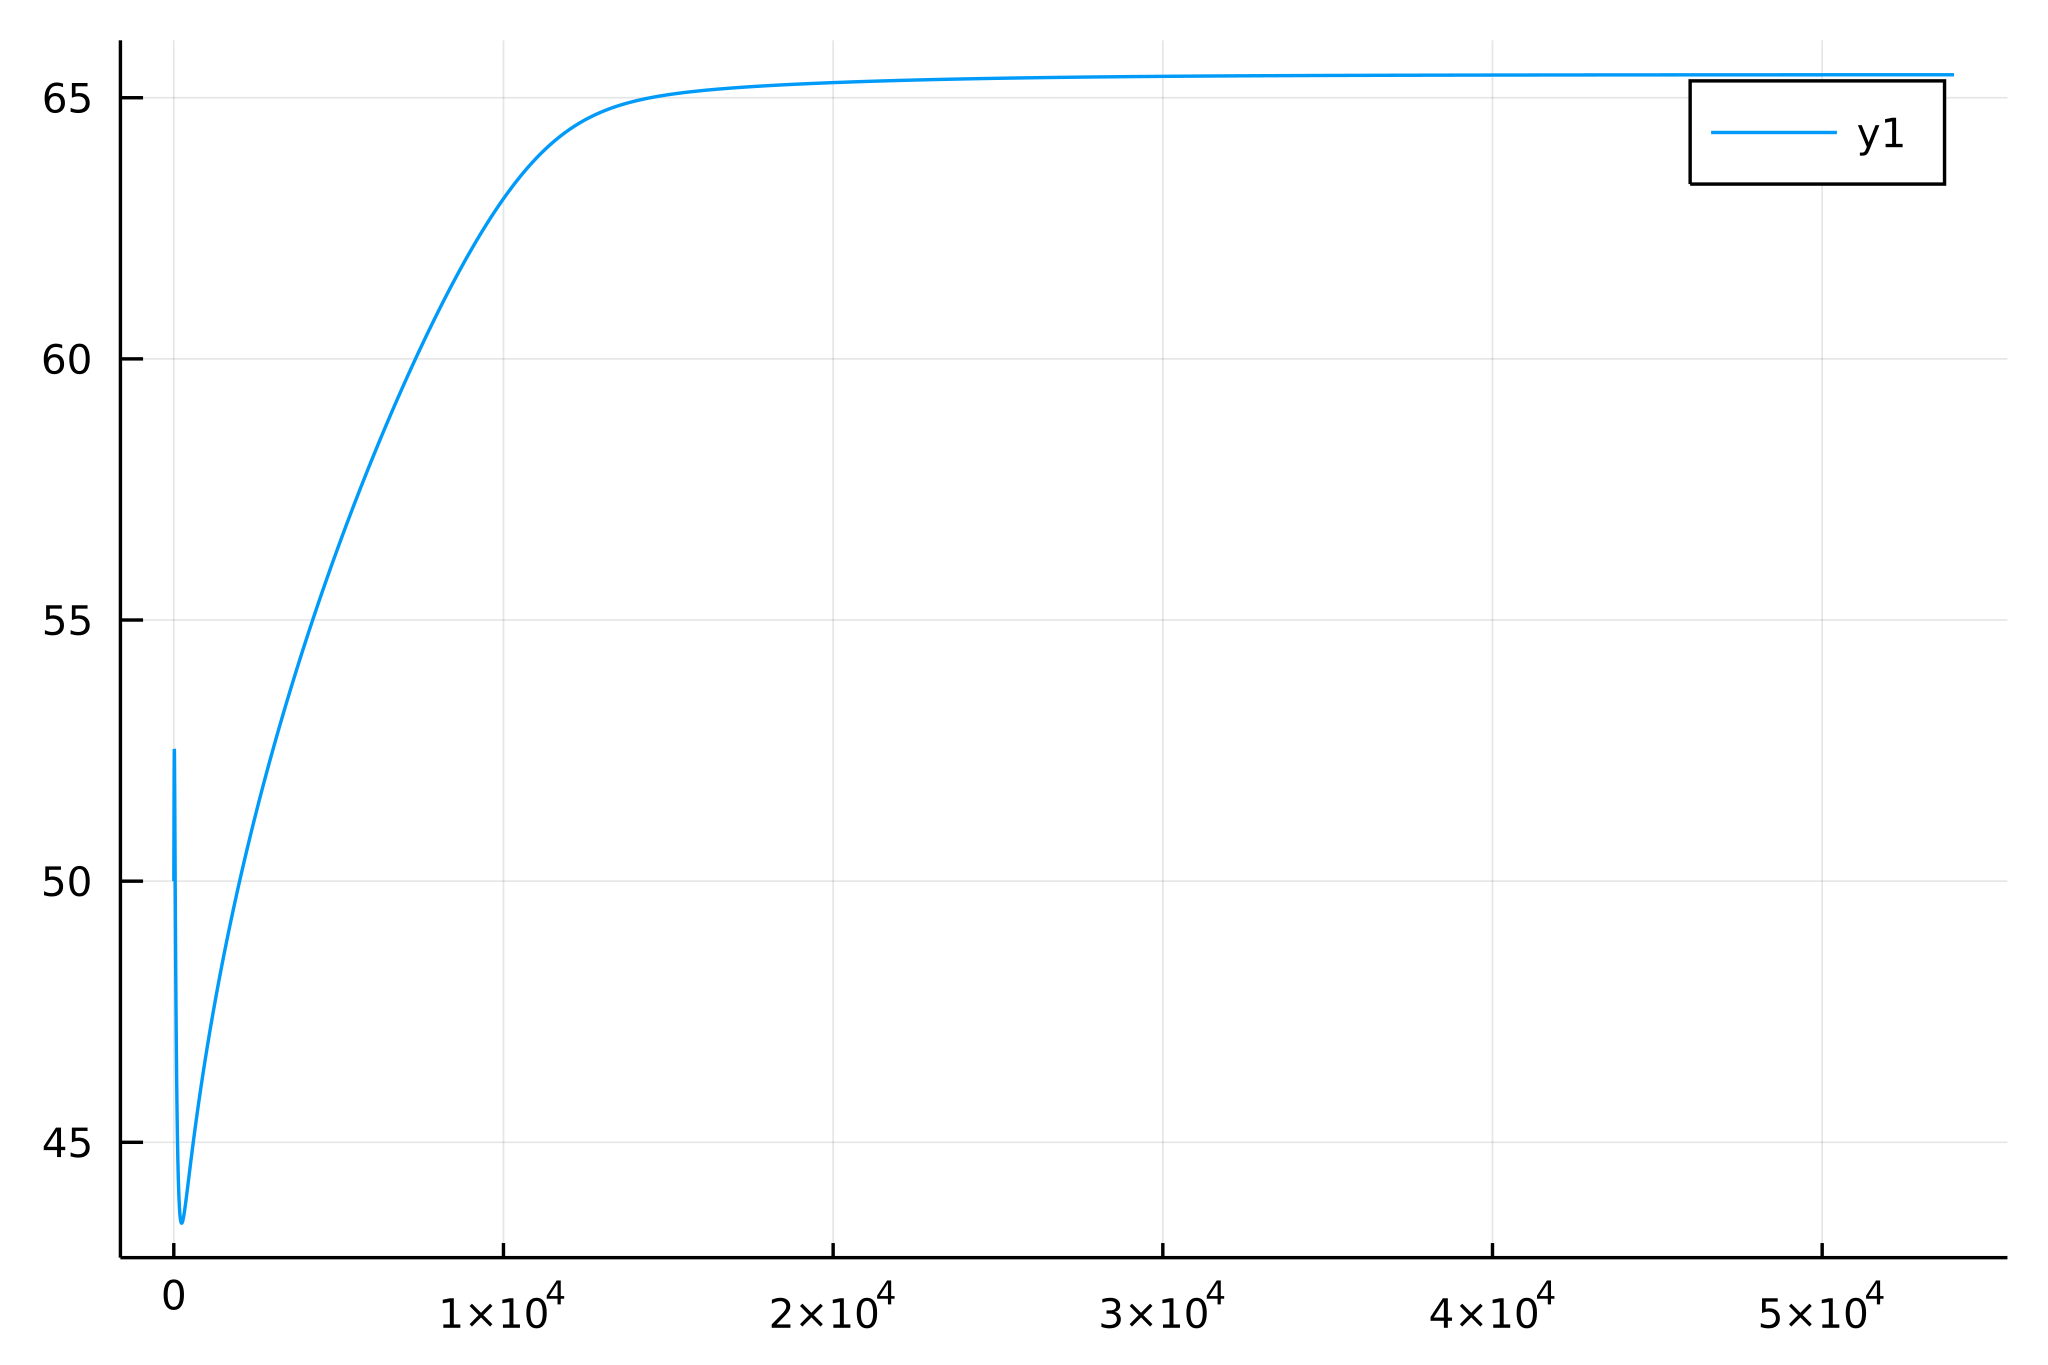

In [15]:
L,l = 14,12;  # 图的大长，小长
R,r = 1.5,0.5;  # 图的大径，小径
d = 0.1;  # 分度长度
M,N = Int(L/d),Int(2*R/d); #横纵切块数
m,n=Int(l/d),Int(2*r/d); #横纵切块
dt = 100; #仿真时序步长
tfinal=600;
step=round(tfinal/dt);

#一些参数设置
Vtotal = l*pi*r^2; #总体积
S = 2*pi*r*l+2*pi*r^2; #总面积
k,c,rho = 0.6,4200,1000;  #水传热系数，比热，密度
ka,ca,rhoa=0.023,1005,1.293;
K = k/c/rho; #折合传热系数
v = 20; #洋流速度
h = 44.45e-3; #高
b = 482.6e-3;#宽
a = 525e-3; #长
V0 = a*b*h; #小体积
Q = 500; #发热量
q = Q/V0; #单位体积发热量
qs0 = q/c/rho; #折合发热量
Number = round(Vtotal/V0); #小盒子数量
Number=190;
qs = Number*V0/Vtotal*qs0; #总折合发热量
T0 = 273.15; #绝对零度
Tenv=20;
Tin=50;

function edge(j::Int64,i::Int64)
    if (M-m)/2<j<(M+m)/2 && (N-n)/2<i<(N+n)/2
        return "in"
    elseif (j==(M-m)/2 || j==(M+m)/2) && (N-n)/2<=i<=(N+n)/2
        return "on-updown"
    elseif (i==(N-n)/2 || i==(N+n)/2) &&  (M-m)/2<=j<=(M+m)/2
        return "on-side"
    elseif i<(N-n)/2 || i>(N+n)/2
        return "side"
    else
        return "updown"
    end
end

function next_ji(j,i,Tnow)
    Tji = Tnow[j,i];
    Tji1 = Tnow[j-1,i];
    Tji2 = Tnow[j+1,i];
    Tji3 = Tnow[j,i-1];
    Tji4 = Tnow[j,i+1];
    T22=(Tji1+Tji2+Tji3+Tji4-4*Tji)/d^2;
    Tz_ = abs((Tji2-Tji1)/2/d);
    rho_a=rhoa*T0/Tji;
    Ka=ka/ca/rho_a
    if edge(j,i)=="in"
        Tji_next=Tji+dt*(Ka*T22+qs);
    elseif edge(j,i)=="side"
        Tji_next=Tji+dt*(K*T22-v*Tz_/c/rho);
    elseif edge(j,i)=="on-side"
        Tji_next=Tji+dt*(Ka*T22+qs-v*Tz_/c/rho);
    elseif edge(j,i)=="on-updown"
        Tji_next=Tji+dt*(Ka*T22+qs);
    else
        Tji_next=Tji+dt*(K*T22+0);
    end
    return Tji_next;
end

function next_T(Tnow)
    T_next=zeros(M,N);
    T_next=T_next.+Tenv.+T0;
    for j in 2:M-1
        for i in 2:N-1
            T_next[j,i]=next_ji(j,i,Tnow);
        end
    end
    return T_next;
end

function get_T_init()
    T_init=zeros(M,N);
    for j in 1:M
        for i in 1:N
            if edge(j,i) in ["in","on-side","on-updown"]
                T_init[j,i]=Tin+T0;
            else
                T_init[j,i]+=Tenv+T0;
            end
        end
    end
    return T_init
end
Titer=Tinit;
Tmax190=[]
for i in 1:6*6*300*5
    tmp=maximum(maximum(Titer))
    push!(Tmax190,tmp)
    Titer=next_T(Titer)
end
Tmax190=Tmax190.-T0
println(maximum(maximum(Titer))-T0)
plot(Tmax190)

# Number=200

67.57962452956599


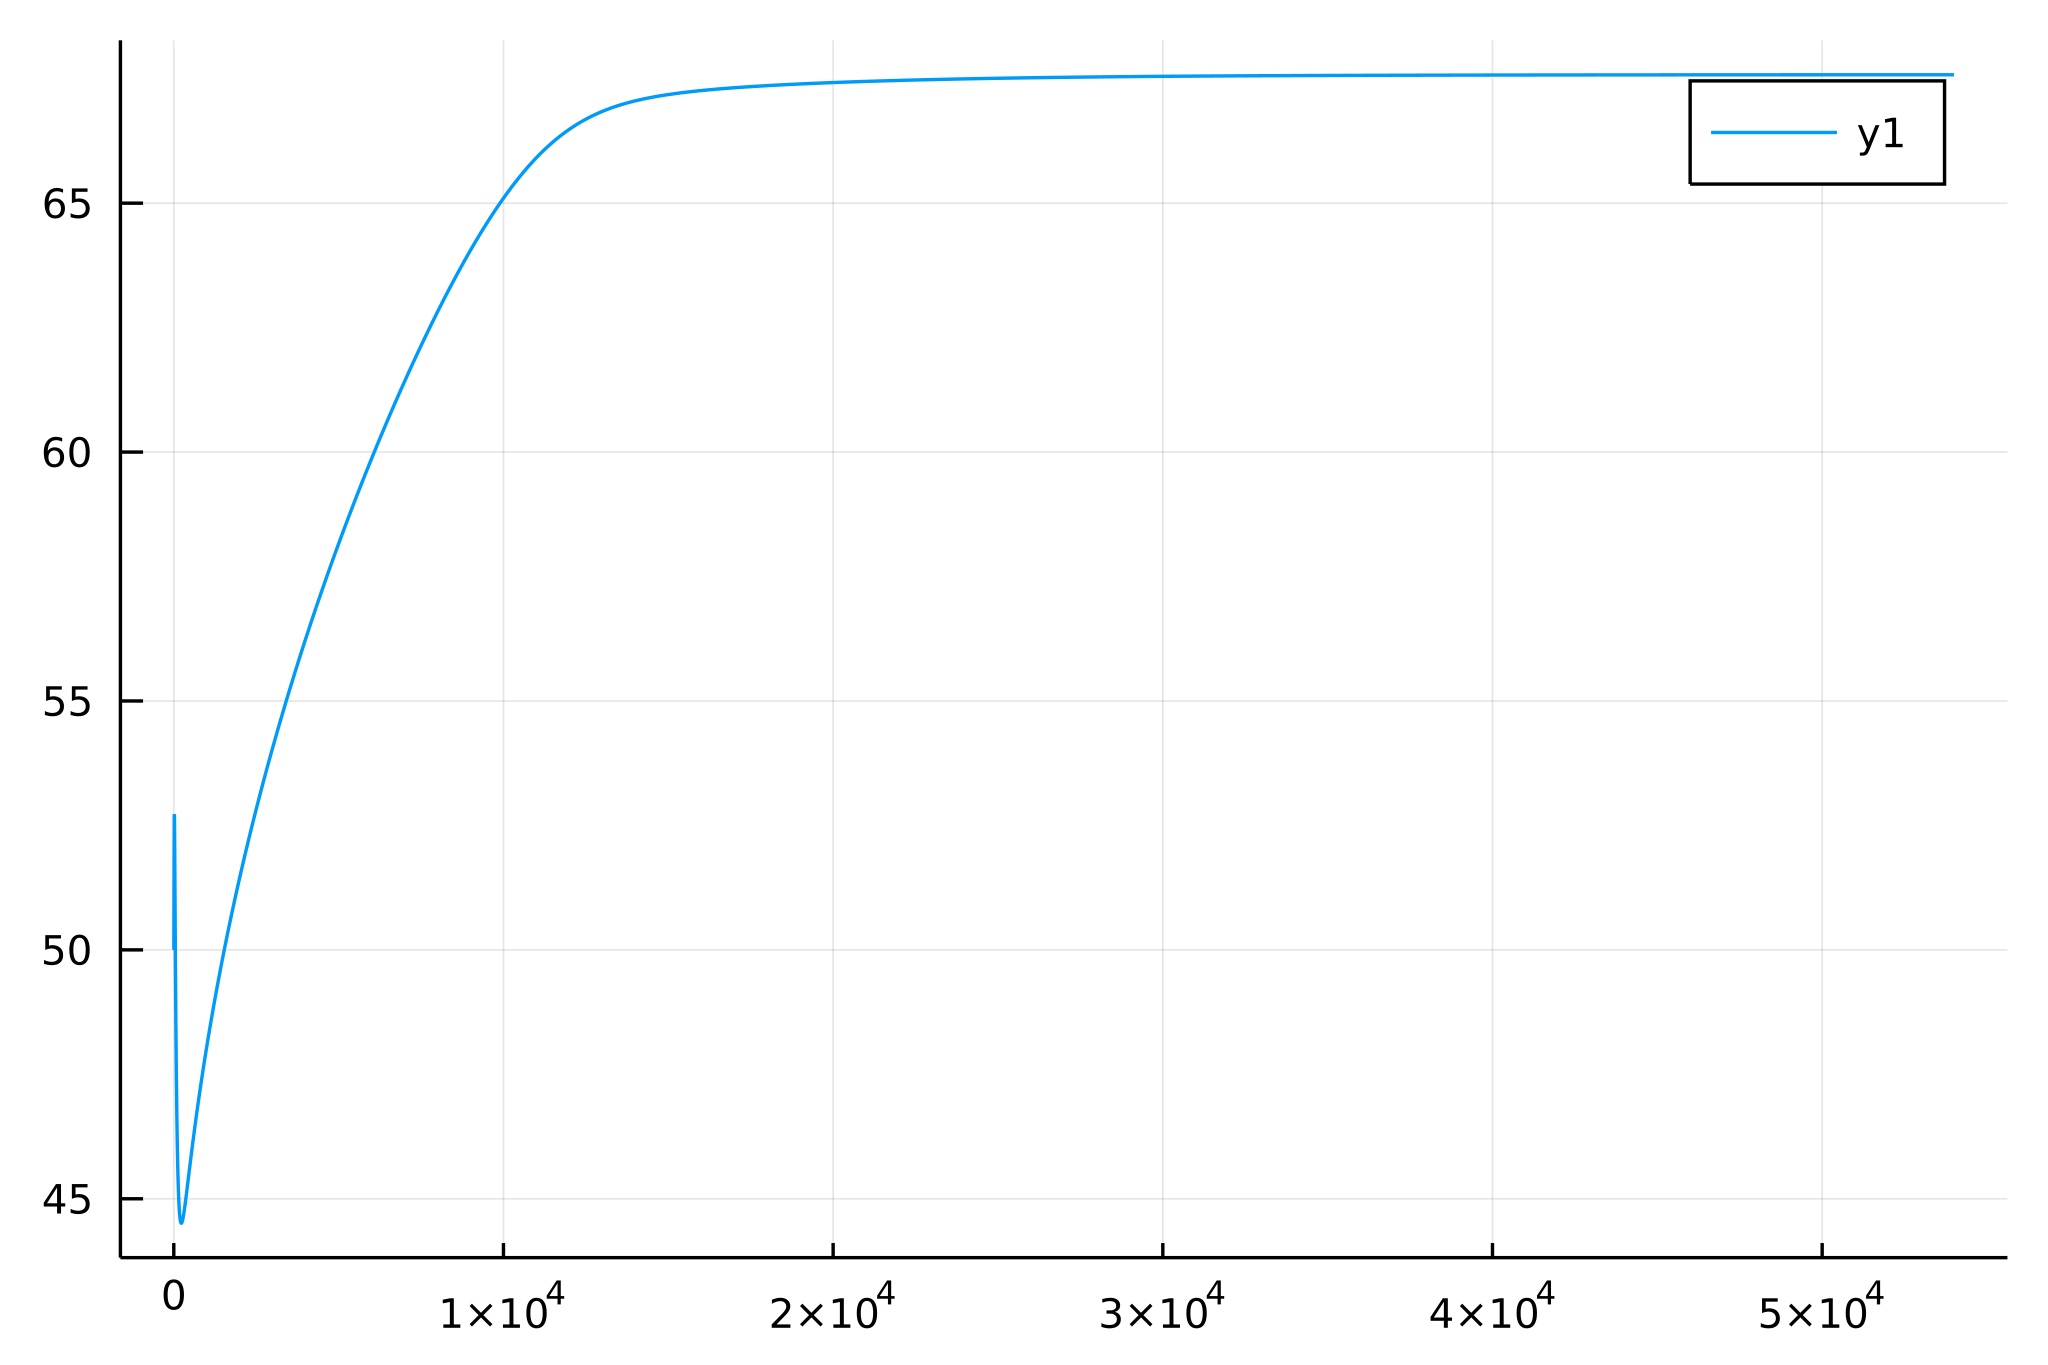

In [16]:
L,l = 14,12;  # 图的大长，小长
R,r = 1.5,0.5;  # 图的大径，小径
d = 0.1;  # 分度长度
M,N = Int(L/d),Int(2*R/d); #横纵切块数
m,n=Int(l/d),Int(2*r/d); #横纵切块
dt = 100; #仿真时序步长
tfinal=600;
step=round(tfinal/dt);

#一些参数设置
Vtotal = l*pi*r^2; #总体积
S = 2*pi*r*l+2*pi*r^2; #总面积
k,c,rho = 0.6,4200,1000;  #水传热系数，比热，密度
ka,ca,rhoa=0.023,1005,1.293;
K = k/c/rho; #折合传热系数
v = 20; #洋流速度
h = 44.45e-3; #高
b = 482.6e-3;#宽
a = 525e-3; #长
V0 = a*b*h; #小体积
Q = 500; #发热量
q = Q/V0; #单位体积发热量
qs0 = q/c/rho; #折合发热量
Number = round(Vtotal/V0); #小盒子数量
Number=200;
qs = Number*V0/Vtotal*qs0; #总折合发热量
T0 = 273.15; #绝对零度
Tenv=20;
Tin=50;

function edge(j::Int64,i::Int64)
    if (M-m)/2<j<(M+m)/2 && (N-n)/2<i<(N+n)/2
        return "in"
    elseif (j==(M-m)/2 || j==(M+m)/2) && (N-n)/2<=i<=(N+n)/2
        return "on-updown"
    elseif (i==(N-n)/2 || i==(N+n)/2) &&  (M-m)/2<=j<=(M+m)/2
        return "on-side"
    elseif i<(N-n)/2 || i>(N+n)/2
        return "side"
    else
        return "updown"
    end
end

function next_ji(j,i,Tnow)
    Tji = Tnow[j,i];
    Tji1 = Tnow[j-1,i];
    Tji2 = Tnow[j+1,i];
    Tji3 = Tnow[j,i-1];
    Tji4 = Tnow[j,i+1];
    T22=(Tji1+Tji2+Tji3+Tji4-4*Tji)/d^2;
    Tz_ = abs((Tji2-Tji1)/2/d);
    rho_a=rhoa*T0/Tji;
    Ka=ka/ca/rho_a
    if edge(j,i)=="in"
        Tji_next=Tji+dt*(Ka*T22+qs);
    elseif edge(j,i)=="side"
        Tji_next=Tji+dt*(K*T22-v*Tz_/c/rho);
    elseif edge(j,i)=="on-side"
        Tji_next=Tji+dt*(Ka*T22+qs-v*Tz_/c/rho);
    elseif edge(j,i)=="on-updown"
        Tji_next=Tji+dt*(Ka*T22+qs);
    else
        Tji_next=Tji+dt*(K*T22+0);
    end
    return Tji_next;
end

function next_T(Tnow)
    T_next=zeros(M,N);
    T_next=T_next.+Tenv.+T0;
    for j in 2:M-1
        for i in 2:N-1
            T_next[j,i]=next_ji(j,i,Tnow);
        end
    end
    return T_next;
end

function get_T_init()
    T_init=zeros(M,N);
    for j in 1:M
        for i in 1:N
            if edge(j,i) in ["in","on-side","on-updown"]
                T_init[j,i]=Tin+T0;
            else
                T_init[j,i]+=Tenv+T0;
            end
        end
    end
    return T_init
end
Titer=Tinit;
Tmax200=[]
for i in 1:6*6*300*5
    tmp=maximum(maximum(Titer))
    push!(Tmax200,tmp)
    Titer=next_T(Titer)
end
Tmax200=Tmax200.-T0
println(maximum(maximum(Titer))-T0)
plot(Tmax200)

In [65]:
using Plots;
TTT=[Tmax150 Tmax160 Tmax170 Tmax180 Tmax190 Tmax200];
ttt=(1:6*6*300*5).*100/60/60/24;
xlabel("t/Days")
ylabel("\$T_{max}\$")
plot(ttt,TTT,title="Tmax With Days When Number Changes",
    xlabel="t/Days",ylabel="Tmax",
    label=["Number=150" "Number=160" "Number=170" "Number=180" "Number=190" "Number=200"])
Plots.savefig("NumberChanges.png")